# MediaPipe

See https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models

See and [this notebook](https://github.com/googlesamples/mediapipe/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb)


In [97]:
!pip install -q mediapipe

In [98]:
# On linux and colab:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

# Windows:
#!powershell.exe Invoke-WebRequest -Uri "https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task" -OutFile "pose_landmarker.task"
#!powershell.exe Invoke-WebRequest -Uri "https://th.bing.com/th/id/R.655322a30501ba490234dc97e0dd2c13?rik=JTIFv9sJ8v%2bhvQ&riu=http%3a%2f%2f4.bp.blogspot.com%2f-lKnJkjW2JW0%2fT8rXbHB21NI%2fAAAAAAAAIfc%2fH6dk_szSXE4%2fs1600%2fLebron%2bJames_2.jpg&ehk=igE97DF2wIjJFXHCYAMDdgBLrNz4KPxL5SUlvpZv%2fN0%3d&risl=&pid=ImgRaw&r=0" -OutFile "image.jpg"


In [99]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style()
    )
  return annotated_image

Reference for the pose detection landmarks:

![image.jpg](https://developers.google.com/static/mediapipe/images/solutions/pose_landmarks_index.png)

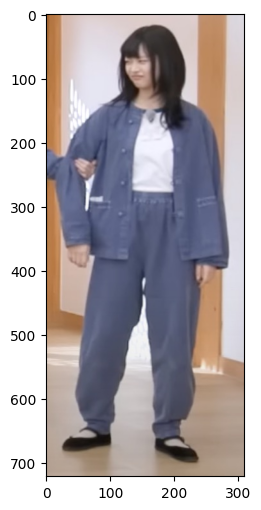

In [100]:
import cv2
from pylab import show, subplots

img = cv2.imread('hanni.jpg')
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(cvt_img, interpolation=None)

I0000 00:00:1717074437.932002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro


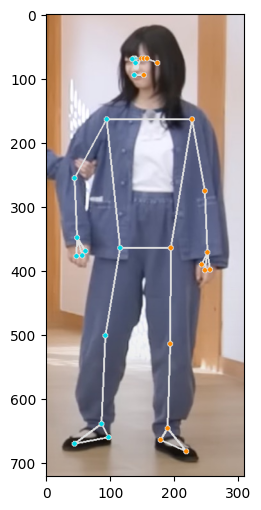

In [101]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("hanni.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)


fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(annotated_image, interpolation=None)


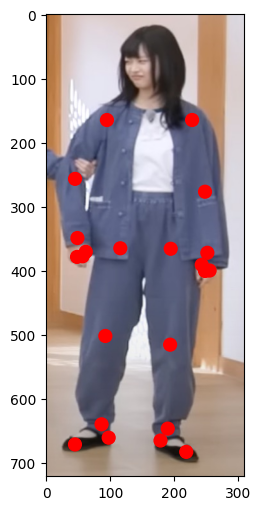

In [102]:
import matplotlib.pyplot as plt

# 12, 14, 16
keys = {
    'shoulder': 12,
    'elbow': 14,
    'wrist': 16
}

landmarks = detection_result.pose_landmarks[0]

# print(landmarks)

width = img.shape[1]
height = img.shape[0]

fig, axs = subplots(1, 1, figsize=(12,6))

for i in range(11, 33):
    part = landmarks[i]
    part_pos = np.array([part.x, part.y, part.z])
    pos = (part_pos[0] * width, part_pos[1] * height)
    axs.add_patch((plt.Circle(pos, 10, color='r')))

# shoulder = landmarks[keys['shoulder']]
# elbow = landmarks[keys['elbow']]
# wrist = landmarks[keys['wrist']]
# 
# shoulder = np.array([shoulder.x, shoulder.y, shoulder.z])
# elbow = np.array([elbow.x, elbow.y, elbow.z])
# wrist = np.array([wrist.x, wrist.y, wrist.z])
# 
# # a.b = |a||b|cos\theta
# 
# v1 = shoulder-elbow
# v1 = v1 / np.sqrt((v1**2).sum())
# v2 = wrist - elbow
# v2 = v2 / np.sqrt((v2**2).sum())
# 
# angle = (np.arccos(np.dot(v1, v2)) / (2*np.pi)) * 360.
# 
# 
# fig, axs = subplots(1, 1, figsize=(12,6))
# 
# shoulder_img_pos = (shoulder[0]*width, shoulder[1]*height)
# elbow_img_pos = (elbow[0]*width, elbow[1]*height)
# wrist_img_pos = (wrist[0]*width, wrist[1]*height)
# 
# axs.add_patch((plt.Circle(shoulder_img_pos, 20, color='r')))
# axs.add_patch((plt.Circle(elbow_img_pos, 20, color='r')))
# axs.add_patch((plt.Circle(wrist_img_pos, 20, color='r')))
# 
# axs.add_patch((plt.Arrow(wrist_img_pos[0], wrist_img_pos[1], elbow_img_pos[0]-wrist_img_pos[0], elbow_img_pos[1]-wrist_img_pos[1], color='b')))
# axs.add_patch((plt.Arrow(shoulder_img_pos[0], shoulder_img_pos[1], elbow_img_pos[0]-shoulder_img_pos[0], elbow_img_pos[1]-shoulder_img_pos[1], color='b')))

# plt.text(elbow_img_pos[0]-20, elbow_img_pos[1]-10, "{0:.2f}".format(angle))

cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs.imshow(cvt_img, interpolation=None)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.5402318e-18..255.0].


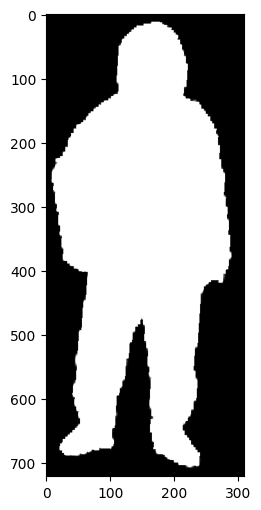

In [103]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
fig, axs = subplots(1, 1, figsize=(12,6))
axs.imshow(visualized_mask, interpolation=None)

# YOLO

This section uses yolo models for pose detection. The goal is to explore various pretrained models to observe their similarities and differences.


## YoloV8
https://docs.ultralytics.com/tasks/pose/
https://docs.ultralytics.com/modes/predict/#probs

In [104]:
!pip install -q ultralytics

In [105]:
# YOLOv8

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-pose.pt")  # load a pretrained model (recommended for training)

# Use the model
imgs = ['hanni.jpg']  # batch of images

results = model(imgs)  # predict on an image


0: 640x288 1 person, 42.4ms
Speed: 1.8ms preprocess, 42.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 288)


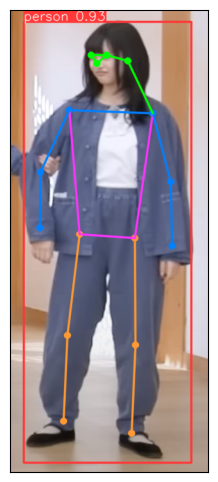

In [106]:
from PIL import Image
from pylab import show, subplots

fig, axs = subplots(1, len(results), figsize=(12,6), squeeze=False)

# Show the results
for i, r in enumerate(results):
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    axs[0,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    axs[0,i].imshow(im, interpolation=None)

In [107]:
r.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9331])
data: tensor([[ 21.0000,  18.0000, 282.0000, 707.0000,   0.9331,   0.0000]])
id: None
is_track: False
orig_shape: (722, 310)
shape: torch.Size([1, 6])
xywh: tensor([[151.5000, 362.5000, 261.0000, 689.0000]])
xywhn: tensor([[0.4887, 0.5021, 0.8419, 0.9543]])
xyxy: tensor([[ 21.,  18., 282., 707.]])
xyxyn: tensor([[0.0677, 0.0249, 0.9097, 0.9792]])

In [108]:
r.keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9928, 0.9837, 0.9493, 0.8913, 0.4740, 0.9964, 0.9954, 0.9872, 0.9798, 0.9833, 0.9749, 0.9992, 0.9991, 0.9954, 0.9954, 0.8973, 0.9041]])
data: tensor([[[1.3523e+02, 8.3124e+01, 9.9283e-01],
         [1.5034e+02, 7.0643e+01, 9.8372e-01],
         [1.2624e+02, 7.0262e+01, 9.4931e-01],
         [1.8347e+02, 7.9748e+01, 8.9134e-01],
         [0.0000e+00, 0.0000e+00, 4.7401e-01],
         [2.2264e+02, 1.6140e+02, 9.9638e-01],
         [9.2087e+01, 1.5603e+02, 9.9536e-01],
         [2.5035e+02, 2.6836e+02, 9.8724e-01],
         [4.7784e+01, 2.5362e+02, 9.7979e-01],
         [2.5275e+02, 3.6810e+02, 9.8330e-01],
         [4.6764e+01, 3.4022e+02, 9.7490e-01],
         [1.9438e+02, 3.5676e+02, 9.9921e-01],
         [1.0853e+02, 3.5063e+02, 9.9911e-01],
         [1.9521e+02, 5.2381e+02, 9.9541e-01],
         [8.9496e+01, 5.0868e+02, 9.9536e-01],
         [1.8908e+02, 6.6182e+02, 8.9730e-01],
         [8.3009e+01, 6.429

In [109]:
r.plot()

array([[[ 72, 123, 185],
        [ 61, 112, 174],
        [ 54, 105, 167],
        ...,
        [225, 218, 221],
        [226, 219, 222],
        [226, 219, 222]],

       [[ 72, 123, 185],
        [ 60, 111, 173],
        [ 54, 105, 167],
        ...,
        [225, 218, 221],
        [225, 218, 221],
        [225, 218, 221]],

       [[ 71, 122, 184],
        [ 59, 110, 172],
        [ 53, 104, 166],
        ...,
        [225, 218, 221],
        [225, 218, 221],
        [225, 218, 221]],

       ...,

       [[149, 163, 182],
        [149, 163, 182],
        [150, 164, 183],
        ...,
        [140, 155, 174],
        [140, 155, 174],
        [140, 155, 174]],

       [[150, 166, 183],
        [150, 166, 183],
        [151, 167, 184],
        ...,
        [138, 155, 174],
        [138, 155, 174],
        [138, 155, 174]],

       [[150, 166, 183],
        [150, 166, 183],
        [151, 167, 184],
        ...,
        [138, 155, 174],
        [138, 155, 174],
        [138, 155, 174]]